
# Installation

In [ ]:
!pip install nltk
!pip install gensim
!pip install wordcloud
!pip install matplotlib_venn_wordcloud

# Imports 

In [73]:
# NLTK
from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
# Gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora
# Wordcloud
from wordcloud import WordCloud
# Venn wordcloud
from matplotlib_venn_wordcloud import venn3_wordcloud
# Matplotlib
import matplotlib.pyplot as plt
# Pandas
import pandas as pd
# Numpy
import numpy as np
# Collections
from collections import defaultdict
# Pillow
from PIL import Image
# Pretty-print
from pprint import pprint
# Pickle
import pickle


# Urllib
from urllib.request import urlopen
# Request
import requests

# Get data

In [4]:
data1 = urlopen("https://github.com/fer-aguirre/wordsVis/blob/master/assets/data/primer_discurso-amlo.txt").read()
data2 = urlopen("https://github.com/fer-aguirre/wordsVis/blob/master/assets/data/segundo_discurso-amlo.txt").read()
data3 = urlopen("https://github.com/fer-aguirre/wordsVis/blob/master/assets/data/tercer_discurso-amlo.txt").read()

In [165]:
file1 = open("../assets/data/primer_discurso-amlo.txt", 'r').read()
file2 = open("../assets/data/segundo_discurso-amlo.txt", 'r').read()
file3 = open("../assets/data/tercer_discurso-amlo.txt", 'r').read()

# Preprocess data

In [166]:
# Remove '\n' from files
file1 = file1.replace('\n','')
file2 = file2.replace('\n','')
file3 = file3.replace('\n','')

In [167]:
# Tokenize files into sentences
sent1 = sent_tokenize(file1)
sent2 = sent_tokenize(file2)
sent3 = sent_tokenize(file3)

In [168]:
# Function to tokenize into words, lowercase and de-accent
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))
        
# Apply fuction 'sent_to_words'
data1 = list(sent_to_words(sent1))
data2 = list(sent_to_words(sent2))
data3 = list(sent_to_words(sent3))

In [169]:
# Define stopwords in Spanish
stop_words = stopwords.words('spanish')

# Fuction to remove defined stop words
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

data1 = remove_stopwords(data1)
data2 = remove_stopwords(data2)
data3 = remove_stopwords(data3)

In [170]:
# Count word frequency
frequency = defaultdict(int)

for text in data1:
    for token in text:
        frequency[token] += 1
        #print(token, frequency[token])
        
text1 = [[token for token in text if frequency[token] > 1] for text in data1]
text2 = [[token for token in text if frequency[token] > 1] for text in data2]
text3 = [[token for token in text if frequency[token] > 1] for text in data3]

In [171]:
# Create a dictionary
id2word_1 = corpora.Dictionary(text1)
id2word_2 = corpora.Dictionary(text2)
id2word_3 = corpora.Dictionary(text3)

In [172]:
# Frequency of terms in the document
corpus1 = [id2word_1.doc2bow(text) for text in text1]
corpus2 = [id2word_2.doc2bow(text) for text in text2]
corpus3 = [id2word_3.doc2bow(text) for text in text3]

In [173]:
# Preview
print(corpus1, corpus2, corpus3)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1)], [(11, 1), (14, 1), (18, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)], [(15, 1), (18, 1), (28, 1), (33, 1), (34, 1), (35, 1)], [], [(3, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)], [(19, 1), (35, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1)], [(39, 1), (51, 1), (56, 1), (57, 1), (58, 1)], [(57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1)], [(30, 1), (59, 1), (61, 1), (62, 1), (64, 1), (65, 1), (66, 1), (67, 1)], [(15, 1), (47, 1), (57, 1), (63, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1)], [(11, 1), (71, 1), (72, 1), (73, 1)], [(38, 1), (47, 1), (74, 1)], [(3, 1), (56, 1), (57, 1), (74, 1), (75, 1)], [(18, 1), (46, 1), (67, 1), (

# Training topic modeling with LDA

In [203]:
# Number of topics
num_topics = 4
# Build LDA model
lda_model1 = gensim.models.LdaMulticore(corpus=corpus1,id2word=id2word_1,num_topics=num_topics)
lda_model2 = gensim.models.LdaMulticore(corpus=corpus2,id2word=id2word_2,num_topics=num_topics)
lda_model3 = gensim.models.LdaMulticore(corpus=corpus3,id2word=id2word_3,num_topics=num_topics)

In [204]:
# Print the keywords on the topics
pprint(lda_model1.print_topics())
pprint(lda_model2.print_topics())
pprint(lda_model3.print_topics())

[(0,
  '0.031*"pueblo" + 0.017*"gobierno" + 0.016*"derecho" + 0.013*"desarrollo" + '
  '0.012*"públicos" + 0.012*"ley" + 0.010*"secretaría" + 0.010*"programas" + '
  '0.010*"trabajo" + 0.010*"parte"'),
 (1,
  '0.021*"funcionarios" + 0.014*"agua" + 0.011*"méxico" + 0.011*"recibirán" + '
  '0.011*"nacional" + 0.011*"solo" + 0.011*"ciudadanos" + 0.011*"vamos" + '
  '0.009*"energía" + 0.009*"mil"'),
 (2,
  '0.014*"méxico" + 0.013*"país" + 0.013*"públicas" + 0.012*"funcionarios" + '
  '0.010*"cualquier" + 0.010*"pequeños" + 0.010*"servicio" + 0.010*"oficinas" '
  '+ 0.010*"gobierno" + 0.010*"empleos"'),
 (3,
  '0.021*"méxico" + 0.016*"pueblos" + 0.016*"pública" + 0.016*"país" + '
  '0.016*"gobierno" + 0.012*"manera" + 0.012*"seguridad" + 0.012*"pueblo" + '
  '0.012*"poder" + 0.012*"bienestar"')]
[(0,
  '0.041*"millones" + 0.041*"mil" + 0.033*"manera" + 0.029*"gobierno" + '
  '0.029*"méxico" + 0.025*"año" + 0.021*"beneficio" + 0.017*"ciento" + '
  '0.013*"público" + 0.013*"programas"'),
 (1,

In [205]:
# Preview
print(lda_model1.print_topics(num_topics=num_topics, num_words=5))
print(lda_model2.print_topics(num_topics=num_topics, num_words=5))
print(lda_model3.print_topics(num_topics=num_topics, num_words=5))

[(0, '0.031*"pueblo" + 0.017*"gobierno" + 0.016*"derecho" + 0.013*"desarrollo" + 0.012*"públicos"'), (1, '0.021*"funcionarios" + 0.014*"agua" + 0.011*"méxico" + 0.011*"recibirán" + 0.011*"nacional"'), (2, '0.014*"méxico" + 0.013*"país" + 0.013*"públicas" + 0.012*"funcionarios" + 0.010*"cualquier"'), (3, '0.021*"méxico" + 0.016*"pueblos" + 0.016*"pública" + 0.016*"país" + 0.016*"gobierno"')]
[(0, '0.041*"millones" + 0.041*"mil" + 0.033*"manera" + 0.029*"gobierno" + 0.029*"méxico"'), (1, '0.054*"pueblo" + 0.040*"mil" + 0.031*"gobierno" + 0.026*"salud" + 0.026*"apoyo"'), (2, '0.037*"pueblo" + 0.027*"estudiantes" + 0.021*"proceso" + 0.020*"política" + 0.020*"pobres"'), (3, '0.044*"ciento" + 0.037*"mil" + 0.034*"méxico" + 0.025*"millones" + 0.024*"año"')]
[(0, '0.032*"méxico" + 0.031*"pública" + 0.029*"país" + 0.025*"mil" + 0.019*"federal"'), (1, '0.048*"ciento" + 0.027*"méxico" + 0.025*"país" + 0.021*"nacional" + 0.020*"mil"'), (2, '0.097*"mil" + 0.062*"millones" + 0.028*"pesos" + 0.027*"a

In [206]:
# Calculate perplexity score of each model (the lower, the better)
print('\nPerplexity: ', lda_model1.log_perplexity(corpus1))
print('\nPerplexity: ', lda_model2.log_perplexity(corpus2))
print('\nPerplexity: ', lda_model3.log_perplexity(corpus3))


Perplexity:  -6.43237157638365

Perplexity:  -5.760587348596298

Perplexity:  -5.604251494813275


In [207]:
# Coherence score (similarity of words in the topic)
coherence_model_lda1 = CoherenceModel(model=lda_model1, texts=text1, dictionary=id2word_1, coherence='c_v')
coherence_lda1 = coherence_model_lda1.get_coherence()

coherence_model_lda2 = CoherenceModel(model=lda_model2, texts=text2, dictionary=id2word_2, coherence='c_v')
coherence_lda2 = coherence_model_lda2.get_coherence()

coherence_model_lda3 = CoherenceModel(model=lda_model3, texts=text3, dictionary=id2word_3, coherence='c_v')
coherence_lda3 = coherence_model_lda3.get_coherence()

print("\nCoherence Score: ", coherence_lda1)
print("\nCoherence Score: ", coherence_lda2)
print("\nCoherence Score: ", coherence_lda3)


Coherence Score:  0.540541164739878

Coherence Score:  0.5400937371677866

Coherence Score:  0.32424737804846027


In [224]:
words_model1 = {'Topic_' + str(i): [token for token, score in lda_model1.show_topic(i, topn=10)] for i in range(0, lda_model1.num_topics)}

In [284]:
list1 = [[token for token, score in lda_model1.show_topic(i, topn=10)] for i in range(0, lda_model1.num_topics)]
list2 = [[token for token, score in lda_model2.show_topic(i, topn=10)] for i in range(0, lda_model2.num_topics)]
list3 = [[token for token, score in lda_model3.show_topic(i, topn=10)] for i in range(0, lda_model3.num_topics)]

In [285]:
model1 = []
for i in range(len(list1)):
    for j in range(len(list1[i])):
        model1.append(list1[i][j])
        
model2 = []
for i in range(len(list2)):
    for j in range(len(list2[i])):
        model2.append(list2[i][j])
        
model3 = []
for i in range(len(list1)):
    for j in range(len(list3[i])):
        model3.append(list3[i][j])

In [286]:
set1 = set(model1)
set2 = set(model2)
set3 = set(model3)

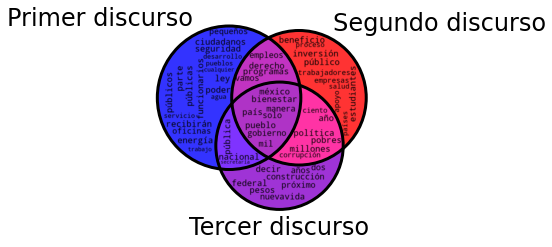

In [292]:
# Color de texto
def color_func(*args, **kwargs):
    return "#000000"
# Diagrama de Venn con los tópicos
v = venn3_wordcloud(sets=(set1, set2, set3), set_labels=("Primer discurso", "Segundo discurso", "Tercer discurso"), wordcloud_kwargs=dict(min_font_size=11, color_func=color_func), set_colors=['blue', 'red', '#8800CC'])


In [299]:
plt.savefig('test.png')

<Figure size 432x288 with 0 Axes>